# Assignment on Data Warehouse (DW) 
## Task 4: Store and time dimensional inventory analysis
    Author: Md. Saif Ahammod Khan
    ID: 2315333650 
    Course: CSE 512
    Course Title: Distributed Database
    Instructor: Dr. Abu Sayed Md. Latiful Hoque 
    Section: 01
    Semister:Spring 2023
    Email: saif.khan.2315333@northsouth.edu
    Contact No: +8801917-089109

### Task 4: The following are the list of analytics:
    1. store and time dimensional financial analytics,
    2. customer and time dimensional financial analytics,
    3. item and time dimensional financial analytics,
    4. store and time dimensional inventory analytics,
    5. item and time dimensional inventory analytics.
    Every student must perform one of the above analytics. The number will selected
    as follows:
    ((Left most 7 digit of your ID) mod 5) + 1
    
    Left most 7 digit of your ID : 2315333
    So,
    ((2315333) mod 5) + 1 = 4
    
    So, The task number 4 is assigned on me which is store and time dimensional inventory analytics.

# 1. Setup Environment

## 1.1. Importing the liberaries

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# 2. Data Load

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="postgres",
                                          user= "postgres",
                                          password= "DDMSass",
                                          host="localhost",
                                          port="5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection
con = PostgresConnection().getConnection()

Successfully connected to the database


# 3. Store and Time Dimensional Inventory Analytics

    We will analysis the inventory of store due to time and location. We will find out the following information from the data and we will visualize it and then we will analysis from those information.
    List of the information we will extract from the data:
    01. TOTAL UNIT SOLD IN EACH YEAR 
    02. TOTAL UNIT SOLD IN DATEWISE
    03. TOTAL UNIT SOLD IN EVERY SEASON
    04. TOTAL UNIT SOLD IN EVERY MONTH
    05. TOTAL UNIT SOLD IN EVERY DIVISION
    06. TOTAL UNIT SOLD IN EVERY DIVISION BASED ON EVERY YEAR
    07. TOP 10 MOST UNIT SELLING STORE KEY AND THEIR LOCATIONS
    08. TOP 10 LEAST UNIT SELLING STORE KEY AND THEIR LOCATIONS
    09. STORE KEY AND LOCATIONS OF HIGHEST UNIT SOLD IN 2021
    10. STORE KEY AND LOCATIONS OF LEAST UNIT SOLD IN 2021
    11. STORE KEYS AND TOTAL UNIT SOLD OF DHAKA DIVISION IN 2021
    12. TOTAL STORE IN EVERY DIVISION
    13. TOTAL STORE AND AVERAGE UNIT SOLD
    
   

## 3.1 TOTAL UNIT SOLD IN EACH YEAR 

### 3.1.1 Information Extract

In [3]:
con = PostgresConnection().getConnection()
query = """
            SELECT  (td.year) as date, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            GROUP BY td.year
            ORDER BY td.year
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Year', 'Unit Sold'])
df

Successfully connected to the database


,Year,Unit Sold
0,2014,816121
1,2015,859999
2,2016,851852
3,2017,854563
4,2018,859258
5,2019,851282
6,2020,857005
7,2021,50105


### 3.1.2 Data Visualization

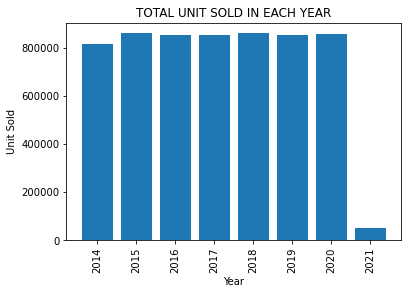

In [4]:
plt.bar(df['Year'], df['Unit Sold'])
plt.title('TOTAL UNIT SOLD IN EACH YEAR')
plt.xlabel('Year')
plt.ylabel('Unit Sold')
plt.xticks(rotation=90)
plt.show()

### 3.1.3 Comments
    Here highst unit sold in 2015 and the lowes unit sold in 2021

## 3.2 TOTAL UNIT SOLD DATEWISE

### 3.2.1 Information Extract

In [5]:
con = PostgresConnection().getConnection()
query = """
            SELECT (td.day) as date, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            GROUP BY td.day
            ORDER BY td.day
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
df = pd.DataFrame(record, columns=['Day', 'Unit Sold'])
df

Successfully connected to the database


,Day,Unit Sold
0,1,198412
1,2,191336
2,3,196643
3,4,202474
4,5,194453
5,6,192484
6,7,197450
7,8,195740
8,9,194655
9,10,194614


### 3..2 Data Visualization

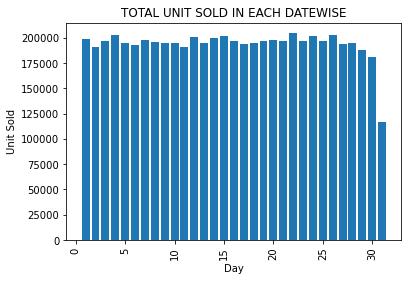

In [6]:
plt.bar(df['Day'], df['Unit Sold'])
plt.title('TOTAL UNIT SOLD IN EACH DATEWISE')
plt.xlabel('Day')
plt.ylabel('Unit Sold')
plt.xticks(rotation=90)
plt.show()

### 3.2.3 Comments
    Unit sale in day wise is quite similier only 31th day of the month has lower unit sell than others as very few months have 31 days in it

## 3.3 TOTAL UNIT SOLD IN EVERY SEASON

### 3.3.1 Information Extract

In [7]:
con = PostgresConnection().getConnection()
query = """
            SELECT  td.quarter, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            GROUP BY td.quarter
            ORDER BY td.quarter
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Season', 'Unit Sold'])
df

Successfully connected to the database


,Season,Unit Sold
0,Q1,1483656
1,Q2,1489068
2,Q3,1521722
3,Q4,1505739


### 3.3.2 Data Visualization

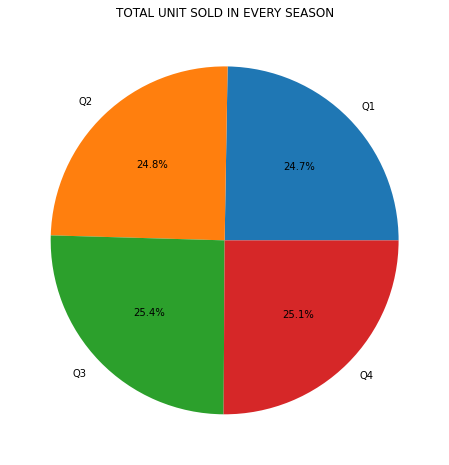

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Season'], autopct='%1.1f%%')
ax.set_title('TOTAL UNIT SOLD IN EVERY SEASON')
plt.show()

### 3.3.3 Comments
    Season 3 and season 4 has slightly more sell then season 1 and season 2

## 3.4 TOTAL UNIT SOLD IN EVERY MONTH

### 3.4.1 Information Extract

In [19]:
con = PostgresConnection().getConnection()
query = """
            SELECT  td.month, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            GROUP BY td.month
            ORDER BY td.month
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Month', 'Unit Sold'])
df

Successfully connected to the database


,Month,Unit Sold
0,1,515352
1,2,459295
2,3,509009
3,4,486156
4,5,517258
5,6,485654
6,7,516339
7,8,509136
8,9,496247
9,10,507718


### 3.4.2 Data Visualization

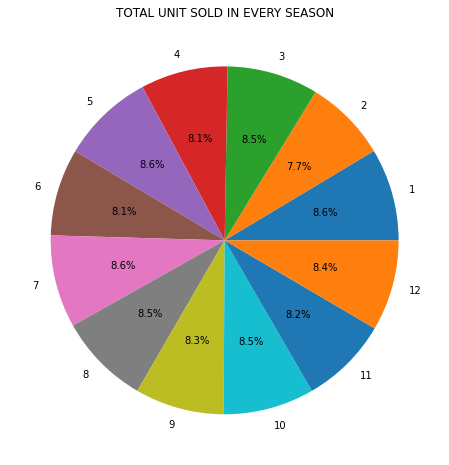

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Month'], autopct='%1.1f%%')
ax.set_title('TOTAL UNIT SOLD IN EVERY SEASON')
plt.show()

### 3.4.3 Comments
    Fifth month which is may has the heighst sell and february has the lowest sell

## 3.5 TOTAL UNIT SOLD IN EVERY DIVISION

### 3.5.1 Information Extract

In [21]:
con = PostgresConnection().getConnection()
query = """
            SELECT  st.division, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            GROUP BY st.division
            ORDER BY st.division
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Division', 'Unit Sold'])
df

Successfully connected to the database


,Division,Unit Sold
0,BARISAL,428042
1,CHITTAGONG,1126300
2,DHAKA,2319920
3,KHULNA,642999
4,RAJSHAHI,689138
5,RANGPUR,480244
6,SYLHET,313542


### 3.5.2 Data Visualization

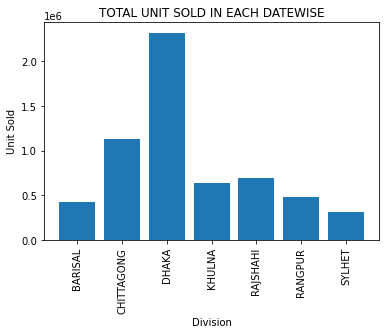

In [22]:
plt.bar(df['Division'], df['Unit Sold'])
plt.title('TOTAL UNIT SOLD IN EACH DATEWISE')
plt.xlabel('Division')
plt.ylabel('Unit Sold')
plt.xticks(rotation=90)
plt.show()

### 3.5.3 Comments
    Dhaka division has the heighst sell and sylhet division has the lowest sell of unit

## 3.6 TOTAL UNIT SOLD IN EVERY DIVISION BASED ON EVERY YEAR

### 3.6.1 Information Extract

In [69]:
import numpy as np
con = PostgresConnection().getConnection()
query = """
            SELECT  td.year, st.division, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            GROUP BY td.year, st.division
            ORDER BY td.year
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
record

df = pd.DataFrame(record, columns=['Year','division', 'Unit Sold'])
df

Successfully connected to the database


,Year,division,Unit Sold
0,2014,BARISAL,58632
1,2014,CHITTAGONG,153191
2,2014,DHAKA,316194
3,2014,KHULNA,87004
4,2014,RAJSHAHI,93779
5,2014,RANGPUR,65337
6,2014,SYLHET,41984
7,2015,BARISAL,61135
8,2015,CHITTAGONG,161020
9,2015,DHAKA,333424


### 3.6.2 Comments
    Here we can see all the unit sell from all dividion yearly.

## 3.7 TOP 10 UNIT SELLING STORE AND THEIR LOCATIONS

### 3.7.1 Information Extract

In [75]:
con = PostgresConnection().getConnection()
query = """
            SELECT  st.store_key, st.division, st.district, st.upazila, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            GROUP BY st.store_key, st.division, st.district, st.upazila
            ORDER BY total_unit_sold DESC LIMIT 10
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Store', 'Division', 'District', 'Upazila', 'Unit Sold'])
df

Successfully connected to the database


,Store,Division,District,Upazila,Unit Sold
0,S00328,DHAKA,MADARIPUR,SHIBCHAR,8980
1,S0010,SYLHET,MAULVIBAZAR,JURI,8965
2,S0039,RANGPUR,DINAJPUR,BIRAMPUR,8909
3,S00601,DHAKA,DHAKA,DARUS SALAM,8904
4,S00462,CHITTAGONG,COMILLA,COMILLA ADARSHA SADAR,8895
5,S00357,DHAKA,NARAYANGANJ,BANDAR,8888
6,S0080,RANGPUR,PANCHAGARH,BODA,8886
7,S00627,DHAKA,DHAKA,KALABAGAN,8877
8,S00360,DHAKA,NARSINGDI,BELABO,8865
9,S00411,CHITTAGONG,BRAHMANBARIA,AKHAURA,8857


### 3.7.2 Data Visualization

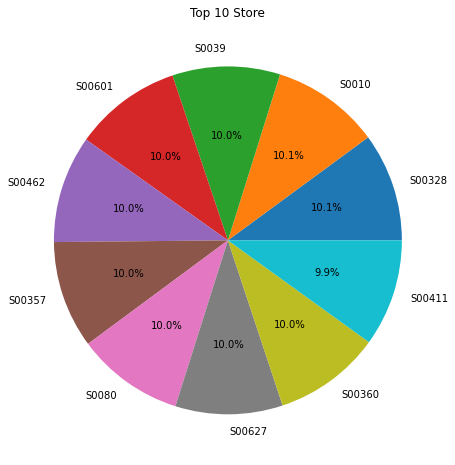

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Store'], autopct='%1.1f%%')
ax.set_title('Top 10 Store')
plt.show()

### 3.7.3 Comments
    5 of the top 10 store based on the unit sold are from dhaka. Others 2 stores are from Chittagong, 2 stores from Sylhet and 1 store is from Rangpur. No stores from Rajshahi, Khulna and Barisal placed in top 10.

## 3.8 LEAST 10 UNIT SELLING STORE AND THEIR LOCATIONS

### 3.8.1 Information Extract

In [77]:
con = PostgresConnection().getConnection()
query = """
            SELECT  st.store_key, st.division, st.district, st.upazila, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            GROUP BY st.store_key, st.division, st.district, st.upazila
            ORDER BY total_unit_sold ASC LIMIT 10
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Store', 'Division', 'District', 'Upazila', 'Unit Sold'])
df

Successfully connected to the database


,Store,Division,District,Upazila,Unit Sold
0,S00550,BARISAL,PIROJPUR,BHANDARIA,7479
1,S00182,KHULNA,JESSORE,BAGHER PARA,7577
2,S00566,RAJSHAHI,RAJSHAHI,PUTHIA,7595
3,S00100,RAJSHAHI,BOGRA,DHUPCHANCHIA,7646
4,S00333,DHAKA,MANIKGANJ,SATURIA,7647
5,S00143,RAJSHAHI,PABNA,PABNA SADAR,7666
6,S00559,RAJSHAHI,RAJSHAHI,BOALIA,7674
7,S00183,KHULNA,JESSORE,CHAUGACHHA,7677
8,S00359,DHAKA,NARAYANGANJ,RUPGANJ,7687
9,S00167,RAJSHAHI,SIRAJGANJ,ULLAH PARA,7705


### 3.8.2 Data Visualization

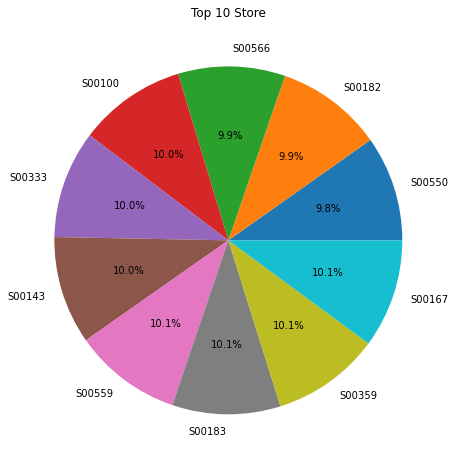

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Store'], autopct='%1.1f%%')
ax.set_title('Least 10 Store')
plt.show()

### 3.8.3 Comments
    5 of the least 10 store, based on the unit sold are from Rajshahi. Others 2 stores are from Dhaka, 2 stores from Khulna and 1 store is from Barisal. No stores from Sylhet, Chittagong and Rangpur placed in least 10.

## 3.9 TOP 10  UNIT SELLING STORE IN MOST RECENT YEAR (2021) AND THEIR LOCATIONS

### 3.9.1 Information Extract

In [83]:
con = PostgresConnection().getConnection()
query = """
            SELECT  st.store_key, st.division, st.district, st.upazila, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            WHERE td.year = 2021
            GROUP BY st.store_key, st.division, st.district, st.upazila
            ORDER BY total_unit_sold DESC LIMIT 10
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Store', 'Division', 'District', 'Upazila', 'Unit Sold'])
df

Successfully connected to the database


,Store,Division,District,Upazila,Unit Sold
0,S00352,DHAKA,MYMENSINGH,PHULPUR,153
1,S00379,DHAKA,RAJBARI,PANGSHA,145
2,S00659,DHAKA,DHAKA,RAMPURA,138
3,S00437,CHITTAGONG,CHITTAGONG,FATIKCHHARI,134
4,S0054,RANGPUR,GAIBANDHA,GOBINDAGANJ,133
5,S00583,KHULNA,KHULNA,TEROKHADA,133
6,S0096,RANGPUR,THAKURGAON,THAKURGAON SADAR,132
7,S00544,BARISAL,PATUAKHALI,DUMKI,131
8,S00413,CHITTAGONG,BRAHMANBARIA,BIJOYNAGAR,130
9,S00661,DHAKA,DHAKA,SABUJBAGH,129


### 3.9.2 Data Visualization

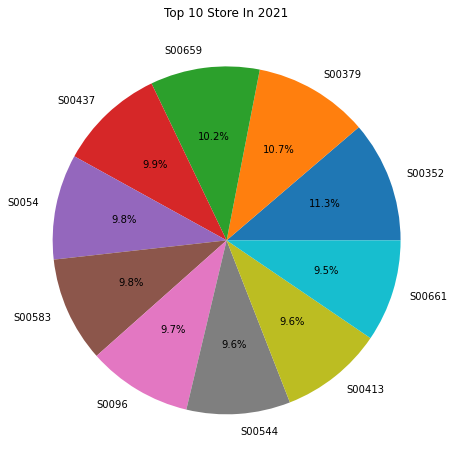

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Store'], autopct='%1.1f%%')
ax.set_title('Top 10 Store In 2021')
plt.show()

### 3.9.3 Comments
    Top 3 stores are from Dhaka and total of 4 from dhaka are placed in top 10 in 2021. Besides 2 stores from Chittagong, 2 stores from Rangpur 1 store from Khulna and 1 store from Barisal are in this top 10 list

## 3.10 LEAST 10 UNIT SELLING STORE IN MOST RECENT YEAR (2021) AND THEIR LOCATIONS

### 3.10.1 Information Extract

In [87]:
con = PostgresConnection().getConnection()
query = """
            SELECT  st.store_key, st.division, st.district, st.upazila, SUM(ft.quantity) as total_unit_sold
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
            WHERE td.year = 2021
            GROUP BY st.store_key, st.division, st.district, st.upazila
            ORDER BY total_unit_sold ASC LIMIT 10
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Store', 'Division', 'District', 'Upazila', 'Unit Sold'])
df

Successfully connected to the database


,Store,Division,District,Upazila,Unit Sold
0,S00349,DHAKA,MYMENSINGH,MYMENSINGH SADAR,7
1,S00124,RAJSHAHI,NAOGAON,SAPAHAR,11
2,S00607,DHAKA,DHAKA,DHANMONDI,15
3,S00219,KHULNA,MEHERPUR,GANGNI,17
4,S0030,SYLHET,SYLHET,COMPANIGANJ,17
5,S00589,DHAKA,DHAKA,BANGSHAL,17
6,S00620,DHAKA,DHAKA,JATRABARI,17
7,S00514,CHITTAGONG,RANGAMATI,RANGAMATI SADAR UP,18
8,S00588,DHAKA,DHAKA,BANGSHAL,18
9,S00709,CHITTAGONG,CHITTAGONG,PANCHLAISH,18


### 3.10.2 Data Visualization

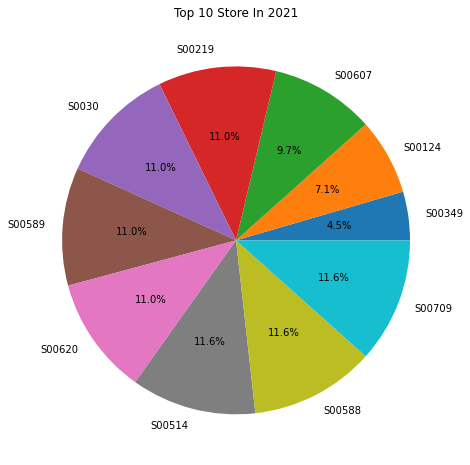

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df['Unit Sold'], labels= df['Store'], autopct='%1.1f%%')
ax.set_title('Top 10 Store In 2021')
plt.show()

### 3.10.3 Comments 
    Here 5 shops from Dhaka, 2 shops from Chittagong, 1 shop from Rajshahi, Sylhet and Khulna

## 3.11 STORES AND TOTAL UNIT SOLD IN DHAKA DIVISION IN 2021

### 3.11.1 Information Extract

In [92]:
con = PostgresConnection().getConnection()
query = """
SELECT  st.store_key, st.division, st.district, st.upazila, SUM(ft.quantity) as total_unit_sold
FROM ecomdb.fact_table ft
JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
JOIN ecomdb.time_dim td ON ft.time_key = td.time_key
WHERE td.year = 2021 AND st.division = 'DHAKA'
GROUP BY st.store_key, st.division, st.district, st.upazila
ORDER BY total_unit_sold DESC 
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Store', 'Division', 'District', 'Upazila', 'Unit Sold'])
df


Successfully connected to the database


,Store,Division,District,Upazila,Unit Sold
0,S00352,DHAKA,MYMENSINGH,PHULPUR,153
1,S00379,DHAKA,RAJBARI,PANGSHA,145
2,S00659,DHAKA,DHAKA,RAMPURA,138
3,S00661,DHAKA,DHAKA,SABUJBAGH,129
4,S00610,DHAKA,DHAKA,BHASAN TEK,126
...,...,...,...,...,...
275,S00588,DHAKA,DHAKA,BANGSHAL,18
276,S00589,DHAKA,DHAKA,BANGSHAL,17
277,S00620,DHAKA,DHAKA,JATRABARI,17
278,S00607,DHAKA,DHAKA,DHANMONDI,15


### 3.11.2 Comments 
    Top three shops based on the unit sell of 2021 are from accordingly Mymenshingh, Rajbari and Dhaka.

## 3.12 TOTAL STORE IN EVERY DIVISION

### 3.12.1 Information Extract

In [94]:
con = PostgresConnection().getConnection()
query = """
SELECT  COUNT(DISTINCT st.store_key) AS "Total Store", st.division
FROM ecomdb.fact_table ft
JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
GROUP BY st.division
ORDER BY st.division
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
record
df = pd.DataFrame(record, columns=['Number of store', 'Division'])
df

Successfully connected to the database


,Number of store,Division
0,52,BARISAL
1,136,CHITTAGONG
2,280,DHAKA
3,78,KHULNA
4,84,RAJSHAHI
5,58,RANGPUR
6,38,SYLHET


### 3.12.2 Data Visualization

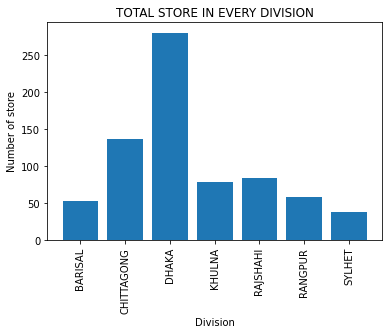

In [95]:
plt.bar(df['Division'], df['Number of store'])
plt.title('TOTAL STORE IN EVERY DIVISION')
plt.xlabel('Division')
plt.ylabel('Number of store')
plt.xticks(rotation=90)
plt.show()

### 3.12.3 Comments
    Here we can see that most store are located in Dhaka division and least store are located in Sylhet.

## 3.13 AVERAGE UNIT SOLD BY A SHOP

### 3.13.1 Information Extract

In [97]:
con = PostgresConnection().getConnection()
query = """
            SELECT  COUNT(DISTINCT st.store_key) AS "Total Store", SUM(ft.quantity)/COUNT(DISTINCT st.store_key) AS AVERAGE_SALE
            FROM ecomdb.fact_table ft
            JOIN ecomdb.store_dim st ON ft.store_key = st.store_key
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(query)
# fetch the results
record = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

df = pd.DataFrame(record, columns=['Total Store', 'Average Unit Sold'])
df

Successfully connected to the database


,Total Store,Average Unit Sold
0,726,8264


### 3.13.3 Comments
    The average unit sell off this supershop is 8264 till now

# This Is The End Of Our Store And Time Dimensional Inventory Analysis